In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

import datajoint as dj
from ibl_pipeline import subject
ephys = dj.create_virtual_module('ephys', 'ibl_ephys')


In [14]:
lab_name = "churchlandlab"
traj = ephys.ProbeInsertion * (ephys.ProbeTrajectory & 'insertion_data_source = "Micro-manipulator"') \
        * subject.Subject * (subject.SubjectLab & 'lab_name = "%s"'%lab_name)
traj = traj.proj('subject_nickname', 'x', 'y', 'theta', 'phi', 'theta', 'depth', 'probe_serial_number')
traj = traj.fetch(format='frame').reset_index()
traj['probe_phi'] = traj['phi'].map({180:'180deg', 0:'0deg'})
traj['angle'] = traj.theta

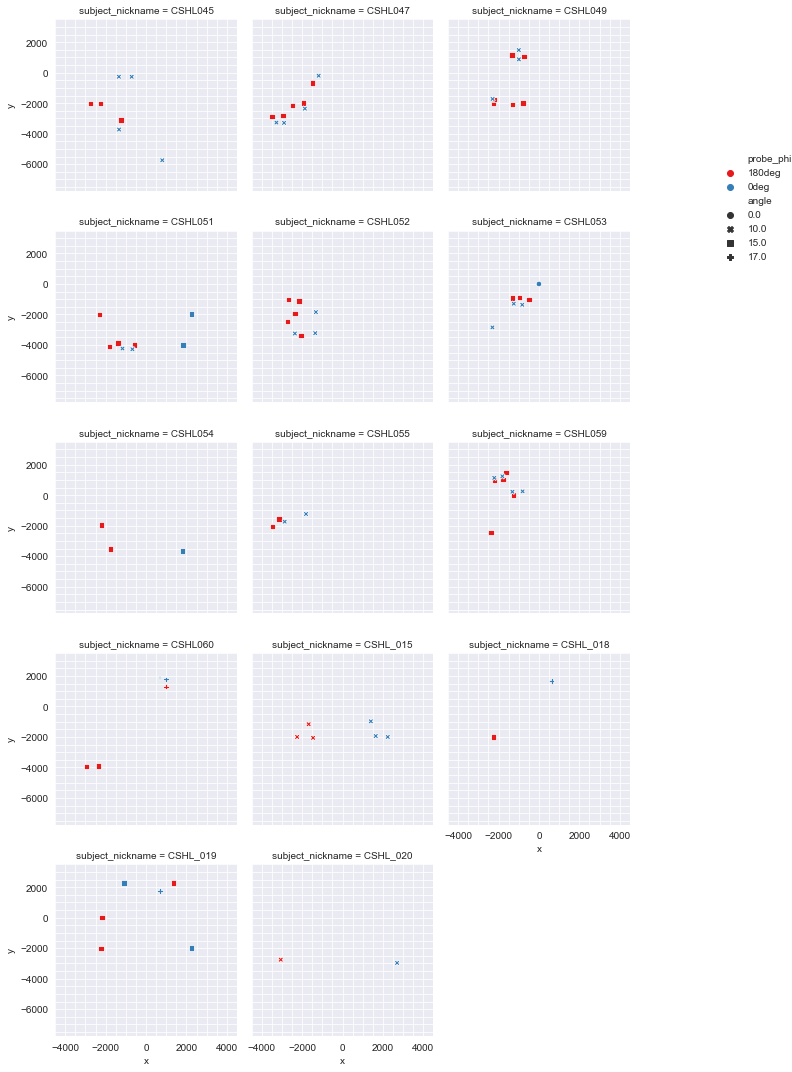

In [16]:

#### plot
sns.set_style('darkgrid')
plt.close('all')
g = sns.FacetGrid(traj, col='subject_nickname', col_wrap=3,
                  col_order=sorted(traj.subject_nickname.unique()),
                  xlim=[-4500, 4500], ylim=[-7750, 3500])
g.map(sns.scatterplot, 'x', 'y', hue=traj.probe_phi, style=traj.angle,
      s=30, palette='Set1').add_legend(bbox_to_anchor=(1.10, 0.8))
for ax in g.axes.flat:
        ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.grid(b=True, which='minor')
